# Short Course: Machine Learning for Exploration Geophysics

Hamburg, 10. - 12. March 2020

#### Computer Class 3.4: Naive Bayes

Table of Content:
- [Packages](#Packages)
- [Import and preprocess the dataset](#Import-and-preprocess-the-dataset)
- [Naive-Bayes](#Naive-Bayes)
- [Terminology-and-derivations-from-a-confusion-matrix](Terminology-and-derivations-from-a-confusion-matrix)
- [Visualize-the-results](Visualize-the-results)

## Packages

Let's first import all the packages: 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a software library for data manipulation and analysis.
- [matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [seaborn](https://seaborn.pydata.org/) is a statistical data visualization library based on matplotlib.
- [scikit-learn](https://scikit-learn.org/stable/) is a simple and efficient tools for predictive data analysis.

In [4]:
#!pip install pandas
#!pip install -U scikit-learn

#!python -m pip install -U pip
#!python -m pip install -U matplotlib

#!pip install pandas

#!pip install seaborn

#!pip install xgboost

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

print('Pandas:  ' + pd.__version__)
print('Numpy:   ' + np.__version__)
print('Sklearn: ' + sklearn.__version__)

Pandas:  0.24.2
Numpy:   1.17.4
Sklearn: 0.22.2.post1


## Import and preprocess the dataset

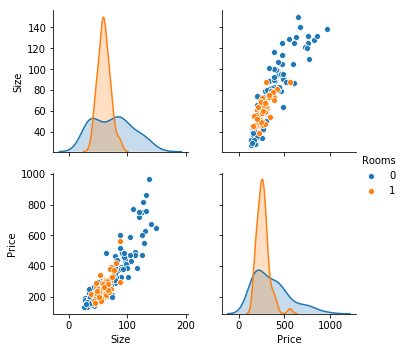

In [6]:
df = pd.read_csv('data/berlin_flat_price.csv')
df['Price'] = df['Price']/1000;  # in 1000s euro

X = df[['Size', 'Price']].values
y = df['Rooms'].values    

# More than two rooms?
#y[y<2.5] = 0             # no
#y[y>2.5] = 1             # yes

# is it a two room apartment?
y[y!=2] = 0             # no
y[y==2] = 1             # yes

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled.mean()
X_scaled.std()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, shuffle=False)

sns.pairplot(df, hue='Rooms', vars=["Size", "Price"])

## Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian



In [7]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_train.shape

(124,)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print(y_pred)

[0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0]


In [10]:
print(y_test)

[1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0]


## Confusion matrix

Function [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) compute confusion matrix to evaluate the accuracy of a classification.

Function [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) provides convenient visualization.

In [11]:
CM = confusion_matrix(y_test, y_pred)
print(CM)

[[ 8 11]
 [ 1 11]]


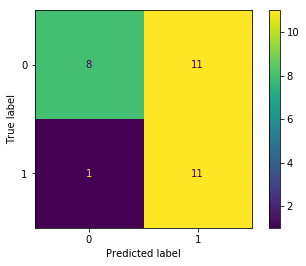

In [12]:
 disp = plot_confusion_matrix(clf, X_test, y_test)

## Terminology and derivations from a confusion matrix
- True positive (TP)
- True negative (TN)
- False positive (FP)
- False negative (FN)

$$ precision  = \frac{TP}{TP +FP} $$

$$ recall  = \frac{TP}{TP +FN} $$

$$ accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

$$ F1 = 2\frac{precision \cdot recall}{precision + recall} $$


F1 score is the harmonic mean of precision and recall

In [13]:
print('precision = %.2f' % precision_score(y_test,y_pred))
print('recall = %.2f' % recall_score(y_test,y_pred))
print('accuracy = %.2f' % accuracy_score(y_test,y_pred))
print('F1 score = %.2f' % f1_score(y_test,y_pred))

precision = 0.50
recall = 0.92
accuracy = 0.61
F1 score = 0.65


## Visualize the results

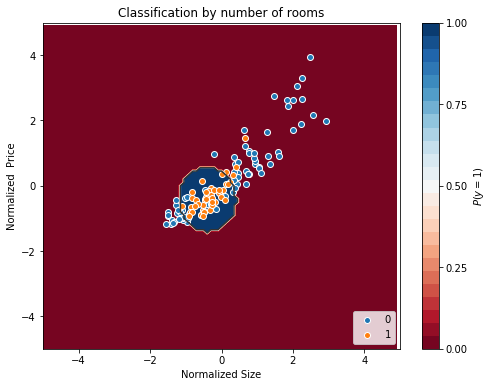

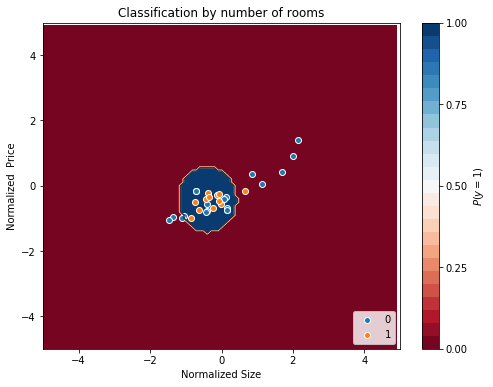

In [16]:
f, ax = plt.subplots(figsize=(8, 6))

mycolors = sns.color_palette()

xx, yy = np.mgrid[-5:5:0.1, -5:5:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict(grid).reshape(xx.shape)

contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train==j,0], X_train[y_train==j,1], color=mycolors[i], marker='o', label=j, edgecolor="white", linewidth=1)
    
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.set(xlim=(-5, 5), ylim=(-5, 5))

plt.xlabel('Normalized Size')
plt.ylabel('Normalized  Price')
plt.title('Classification by number of rooms')
plt.legend(loc='lower right')
plt.show()

f, ax = plt.subplots(figsize=(8, 6))

mycolors = sns.color_palette()

xx, yy = np.mgrid[-5:5:0.1, -5:5:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict(grid).reshape(xx.shape)

contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_test[y_test==j,0], X_test[y_test==j,1], color=mycolors[i], marker='o', label=j, edgecolor="white", linewidth=1)
    
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.set(xlim=(-5, 5), ylim=(-5, 5))

plt.xlabel('Normalized Size')
plt.ylabel('Normalized  Price')
plt.title('Classification by number of rooms')
plt.legend(loc='lower right')
plt.show()